In [91]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Load dataset
RAW_DATA = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
csv_file = os.path.join(RAW_DATA, 'data\\raw\\560_bodyfat.tsv.gz')

In [21]:
df = pd.read_csv(csv_file, sep='\t')

In [22]:
df.head()

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,target
0,1.0708,23.0,154.25,67.75,36.200001,93.099998,85.199997,94.500000,59.000000,37.299999,21.900000,32.000000,27.400000,17.100000,12.300000
1,1.0853,22.0,173.25,72.25,38.500000,93.599998,83.000000,98.699997,58.700001,37.299999,23.400000,30.500000,28.900000,18.200001,6.100000
2,1.0414,22.0,154.00,66.25,34.000000,95.800003,87.900002,99.199997,59.599998,38.900002,24.000000,28.799999,25.200001,16.600000,25.299999
3,1.0751,26.0,184.75,72.25,37.400002,101.800003,86.400002,101.199997,60.099998,37.299999,22.799999,32.400002,29.400000,18.200001,10.400000
4,1.0340,24.0,184.25,71.25,34.400002,97.300003,100.000000,101.900002,63.200001,42.200001,24.000000,32.200001,27.700001,17.700001,28.700001


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   Age      252 non-null    float64
 2   Weight   252 non-null    float64
 3   Height   252 non-null    float64
 4   Neck     252 non-null    float64
 5   Chest    252 non-null    float64
 6   Abdomen  252 non-null    float64
 7   Hip      252 non-null    float64
 8   Thigh    252 non-null    float64
 9   Knee     252 non-null    float64
 10  Ankle    252 non-null    float64
 11  Biceps   252 non-null    float64
 12  Forearm  252 non-null    float64
 13  Wrist    252 non-null    float64
 14  target   252 non-null    float64
dtypes: float64(15)
memory usage: 29.7 KB


In [28]:
df.corrwith(df['target']).sort_values()

Density   -0.987782
Height    -0.089495
Ankle      0.265970
Age        0.291458
Wrist      0.346575
Forearm    0.361387
Neck       0.490592
Biceps     0.493271
Knee       0.508665
Thigh      0.559608
Weight     0.612414
Hip        0.625201
Chest      0.702620
Abdomen    0.813432
target     1.000000
dtype: float64

In [36]:
from sklearn.model_selection import train_test_split

In [72]:
train, test = train_test_split(df, test_size = 0.25, random_state=101) 

In [70]:
train.shape

(189, 15)

In [73]:
X_train = train.drop(['target'], axis=1)
y_train = train['target']

In [75]:
X_test = test.drop(['target'], axis=1)
y_test = test['target']

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [78]:
X_scaler = StandardScaler()
y_scaler = StandardScaler()

In [88]:
y_train.shape

(189,)

In [98]:
y_train = np.array(y_train).reshape(-1, 1) 
y_test = np.array(y_test).reshape(-1, 1)

In [93]:
X_train_scaled = X_scaler.fit_transform(X_train)
y_train_scaled = y_scaler.fit_transform(y_train)

In [99]:
X_test_scaled = X_scaler.transform(X_test)
y_test_scaled = y_scaler.transform(y_test)

In [100]:
lr_model = LinearRegression()

In [102]:
lr_model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [103]:
y_pred = lr_model.predict(X_test_scaled)

In [60]:
from sklearn.metrics import mean_squared_error, r2_score

In [104]:
mse = mean_squared_error(y_test_scaled, y_pred)

In [105]:
rmse = mse**0.5

In [106]:
rmse

0.10688114279378307

In [107]:
r2_score(y_test_scaled,y_pred)

0.9885242929265002

In [64]:
lr_model.coef_

array([-0.91991293,  0.02705828,  0.01127887,  0.01372244, -0.00846245,
        0.05462845,  0.0169748 ,  0.02031492,  0.01447444, -0.00646801,
       -0.02970505, -0.02842903,  0.01173479,  0.00858549])

In [108]:
y_pred.shape

(63, 1)

In [111]:
# Inverse
y_pred_inv = y_scaler.inverse_transform(y_pred)

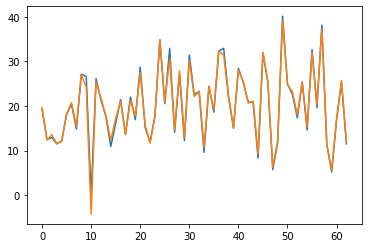

In [112]:
plt.plot(y_test)
plt.plot(y_pred_inv)